In [1]:
import pandas as pd
import os
import glob

folder_path = "data"

csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Remove channel-level summary file
csv_files = [f for f in csv_files if "channels_summary" not in f.lower()]

df_list = []
for f in csv_files:
    print("Loading:", f)
    df_list.append(pd.read_csv(f))

df = pd.concat(df_list, ignore_index=True)

df = df.fillna("")

# Genre dictionary

genres = {
    "Rescue/Adoption": ["rescue", "adopted", "stray", "shelter", "feral"],
    "Funny/Comedy": ["funny", "hilarious", "compilation", "fails", "zoomies", "weird", "chaos", "silly", "goofy"],
    "Talking Cats": ["talking", "meow", "conversation", "voice", "chatty"],
    "Travel/Adventure": ["travel", "outdoor", "adventure", "hiking", "car"],
    "Daily Life/Vlog": ["morning", "routine", "day", "vlog", "daily", "cleaning"],
    "Food/Treats": ["eating", "food", "treats", "dinner", "feeding"],
}

# Assign genres
def assign_genres(row):
    text = " ".join([
        str(row["title"]),
        str(row["description"]),
        str(row["tags"]),
        str(row["hashtags"]),
    ]).lower()

    matched = [g for g, words in genres.items() if any(w in text for w in words)]
    return ", ".join(matched) if matched else "Uncategorized"

df["genres"] = df.apply(assign_genres, axis=1)

# Save output
output_path = os.path.join(folder_path, "videos_with_genres.csv")
df.to_csv(output_path, index=False)
print("Saved:", output_path)


Loading: data/The_Meow_Show.csv
Loading: data/TakeYourDoseOfCats.csv
Loading: data/Chip_The_Manx.csv
Loading: data/Little_Love.csv
Loading: data/DailyDoseOfInternetCats.csv
Loading: data/OwlKitty.csv
Loading: data/FunnyPaws.csv
Loading: data/cats101.csv
Loading: data/Princess_Nika_cat.csv
Loading: data/Walter_the_Catt.csv
Loading: data/CatPusic_Team.csv
Loading: data/Cole_and_Marmalade.csv
Loading: data/Crunchycat.csv
Loading: data/videos_with_genres.csv
Loading: data/Meowphorius.csv
Loading: data/Funny_And_Cute_Cats_Life.csv
Loading: data/Purrfect_Pets.csv
Loading: data/el_Cato.csv
Loading: data/CAT_MAN_CHRIS.csv
Loading: data/Feeding_Street_Cats.csv
Loading: data/catmp4.csv
Loading: data/Pawsome_Cats_of_the_Internet.csv
Loading: data/Chef_Cat_ChangAn.csv
Loading: data/funcatflicks.csv
Loading: data/Renus_Delph.csv
Loading: data/CaD_Animals.csv
Loading: data/Maine_Coon_Kittens.csv
Loading: data/Dexter_The_Cat.csv
Loading: data/Tasty_Paws.csv
Saved: data/videos_with_genres.csv


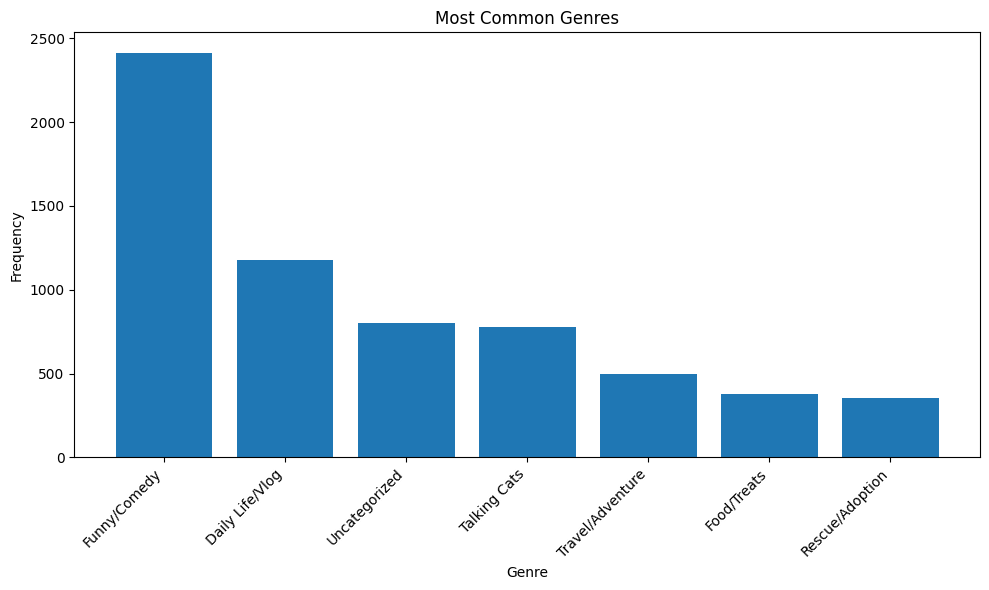

In [2]:
import matplotlib.pyplot as plt


if "genres" not in df.columns:
    raise ValueError("No genres found")


# Split multi-genre rows

all_genres = []

for entry in df["genres"]:
    if isinstance(entry, str):
        for g in entry.split(","):
            g = g.strip()
            if g:
                all_genres.append(g)

# Count genre frequency

from collections import Counter
genre_counts = Counter(all_genres)

# Get top N genres

top_n = 7
top_genres = genre_counts.most_common(top_n)

labels = [g for g, _ in top_genres]
counts = [c for _, c in top_genres]

# Plot

plt.figure(figsize=(10, 6))
plt.bar(labels, counts)
plt.xticks(rotation=45, ha="right")
plt.title("Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


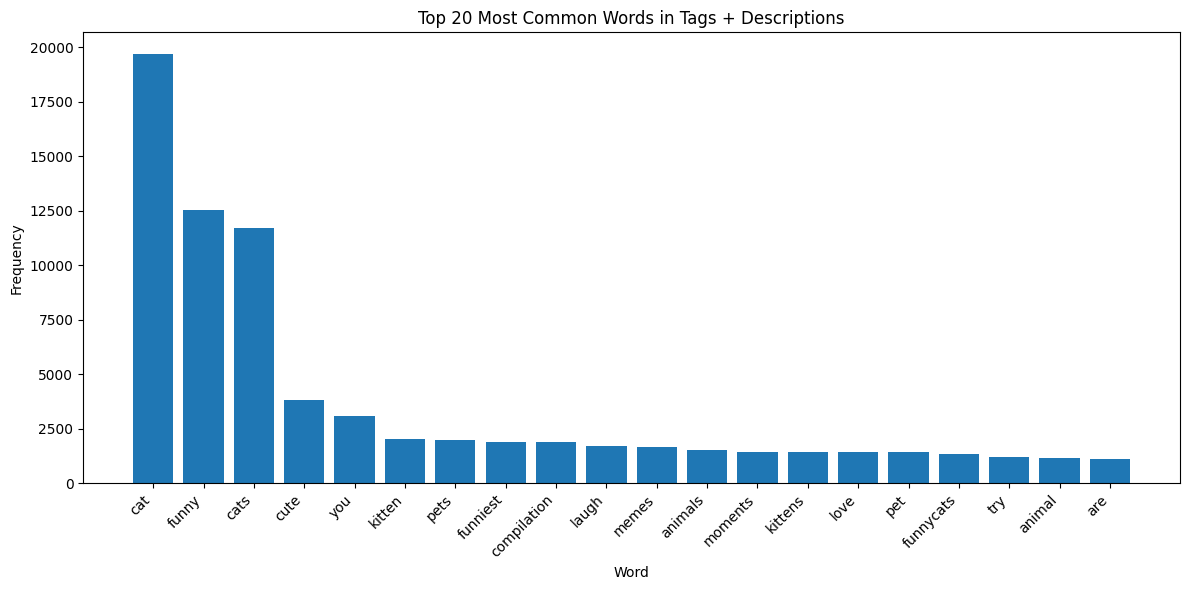

In [3]:
import matplotlib.pyplot as plt
import re
from collections import Counter



# Combine tags + description text

df_clean = df.fillna("")
text_data = df_clean["tags"].astype(str) + " " + df_clean["description"].astype(str)


# Clean text

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

cleaned = text_data.apply(clean_text)

# Count words

all_words = " ".join(cleaned).split()

stopwords = {
    "the","and","a","to","in","of","for","is","on","with","my",
    "at","this","that","it","me","our","your","we","as","from", "www", "https", "youtube", "com", "s", "video", "not", "videos", "t",
}

filtered_words = [w for w in all_words if w not in stopwords]
word_counts = Counter(filtered_words)

# Get top 20

top_words = word_counts.most_common(20)
words = [w for w, _ in top_words]
counts = [c for _, c in top_words]


# Plot

plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha="right")
plt.title("Top 20 Most Common Words in Tags + Descriptions")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [4]:
from collections import Counter
import re

def most_common_tags(genre_name, top_n=10):
    # Filter by genre
    subset = df[df["genres"].str.contains(genre_name, na=False)]
    
    # Combine all tags
    all_tags = subset["tags"].astype(str).str.lower().str.cat(sep=" ")
    
    # Split and clean
    words = re.findall(r'\w+', all_tags)
    
    counter = Counter(words)
    return counter.most_common(top_n)


print("Top tags in Rescue/Adoption:", most_common_tags("Rescue/Adoption"))
print("Top tags in Funny/Comedy:", most_common_tags("Funny/Comedy"))
print("Top tags in Talking Cats:", most_common_tags("Talking Cats"))
print("Top tags in Travel/Adventure:", most_common_tags("Travel/Adventure"))
print("Top tags in Daily Life/Vlog:", most_common_tags("Daily Life/Vlog"))
print("Top tags in Food/Treats:", most_common_tags("Food/Treats"))

Top tags in Rescue/Adoption: [('cat', 2100), ('kitten', 615), ('stray', 561), ('kittens', 549), ('rescue', 540), ('cute', 429), ('cats', 426), ('feeding', 252), ('paws', 222), ('adorable', 219)]
Top tags in Funny/Comedy: [('cat', 10059), ('funny', 8286), ('cats', 6258), ('videos', 4623), ('cute', 2157), ('memes', 1407), ('video', 1380), ('compilation', 1188), ('pets', 1155), ('pet', 1116)]
Top tags in Talking Cats: [('cat', 5028), ('funny', 2178), ('cats', 1572), ('videos', 1494), ('cute', 1260), ('kitten', 828), ('kittens', 660), ('stray', 540), ('dog', 528), ('memes', 528)]
Top tags in Travel/Adventure: [('cat', 909), ('cats', 459), ('funny', 354), ('cute', 174), ('videos', 156), ('video', 129), ('kitten', 126), ('kittens', 117), ('and', 102), ('of', 84)]
Top tags in Daily Life/Vlog: [('cat', 5355), ('funny', 3606), ('cats', 3303), ('videos', 1782), ('cute', 1230), ('and', 882), ('video', 771), ('animals', 657), ('funniest', 582), ('animal', 576)]
Top tags in Food/Treats: [('cat', 22

                                                  title  \
3200                                    This bothers me   
3950                                    This bothers me   
2450                                    This bothers me   
1900  Cesar the cat wanted to enjoy his outing after...   
2950  Cesar the cat wanted to enjoy his outing after...   
3700  Cesar the cat wanted to enjoy his outing after...   
1616  I Confronted My Cat’s Online Haters & This Is ...   
766   I Confronted My Cat’s Online Haters & This Is ...   
116   I Confronted My Cat’s Online Haters & This Is ...   
1510  7 Year Old Siamese Cat Saved from Suffering on...   

                                          genres  view_count  like_count  \
3200                               Uncategorized       12692        4347   
3950                               Uncategorized       12692        4347   
2450                               Uncategorized       12692        4347   
1900  Rescue/Adoption, Talking Cats, Food/Trea

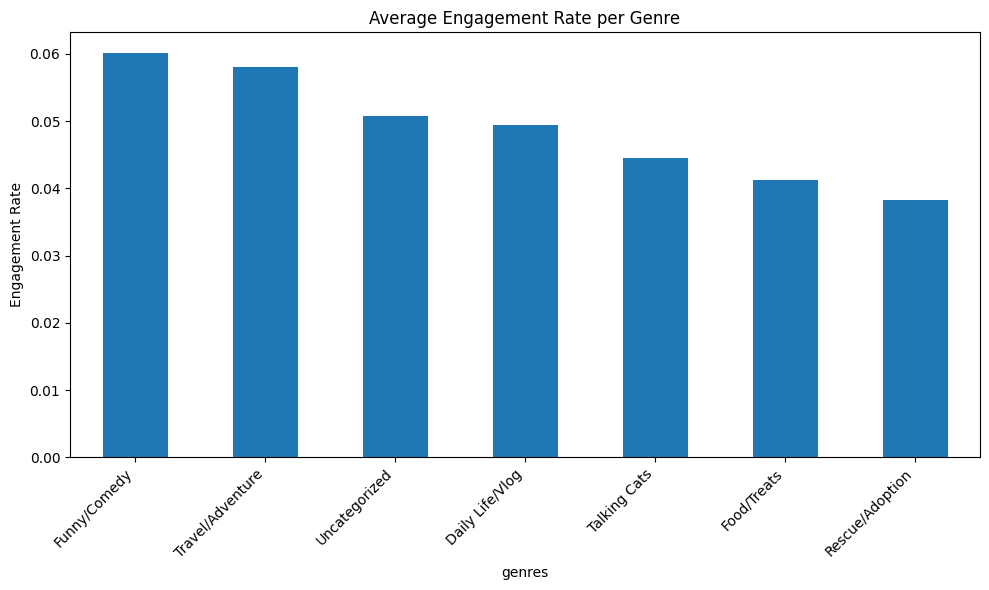

In [5]:
import pandas as pd

# Ensure numeric
for col in ["view_count", "like_count", "comment_count"]:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Compute engagement rate
df["engagement_rate"] = (df["like_count"] + df["comment_count"]) / df["view_count"]
df["engagement_rate"] = df["engagement_rate"].fillna(0)

# Top 10 videos by engagement
top_engagement = df.sort_values("engagement_rate", ascending=False)[
    ["title", "genres", "view_count", "like_count", "comment_count", "engagement_rate"]
].head(10)
print(top_engagement)

# Average engagement per genre (handles multi-genres)
df_exploded = df.copy()
df_exploded["genres"] = df_exploded["genres"].str.split(",").explode("genres").str.strip()
avg_engagement_per_genre = df_exploded.groupby("genres")["engagement_rate"].mean().sort_values(ascending=False)
print(avg_engagement_per_genre)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
avg_engagement_per_genre.plot(kind="bar")
plt.title("Average Engagement Rate per Genre")
plt.ylabel("Engagement Rate")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Detected genres: ['Daily Life/Vlog', 'Food/Treats', 'Funny/Comedy', 'Rescue/Adoption', 'Talking Cats', 'Travel/Adventure', 'Uncategorized']


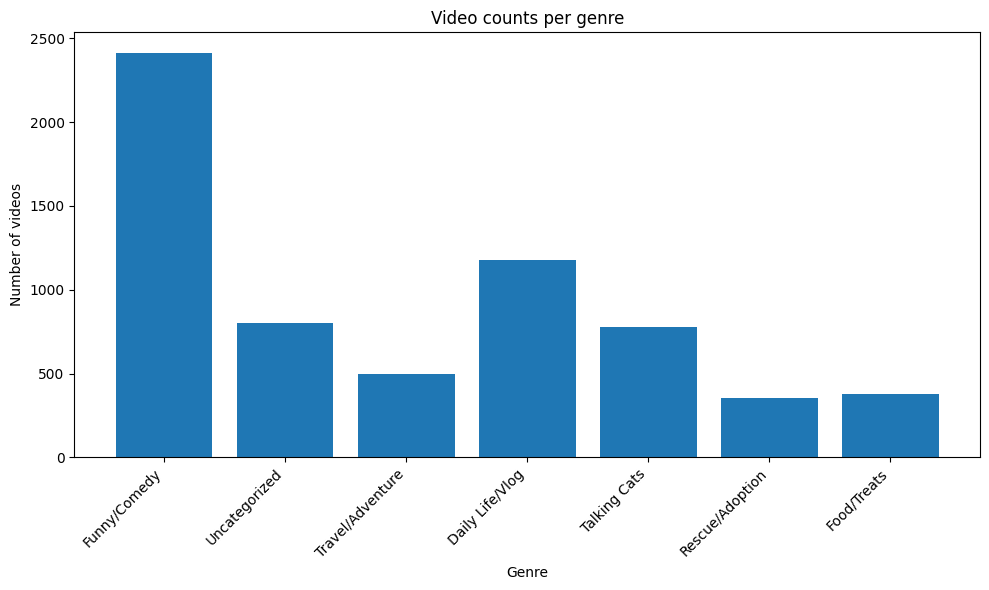

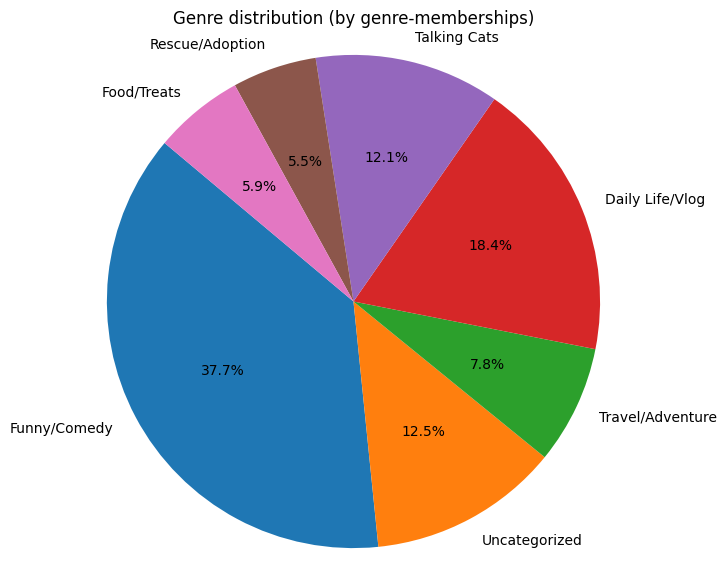


Average clustering coefficient (weighted): 0.1638985640028146

Top genres by betweenness centrality:
  Rescue/Adoption: 0.3000
  Travel/Adventure: 0.3000
  Daily Life/Vlog: 0.0000
  Food/Treats: 0.0000
  Funny/Comedy: 0.0000
  Talking Cats: 0.0000
  Uncategorized: 0.0000

Top genres by degree centrality:
  Daily Life/Vlog: 0.8333
  Food/Treats: 0.8333
  Funny/Comedy: 0.8333
  Rescue/Adoption: 0.8333
  Talking Cats: 0.8333
  Travel/Adventure: 0.8333
  Uncategorized: 0.0000

Top genres by weighted degree:
  Funny/Comedy: 1548
  Daily Life/Vlog: 1536
  Talking Cats: 1029
  Travel/Adventure: 720
  Food/Treats: 633
  Rescue/Adoption: 516
  Uncategorized: 0

Detected communities:
  Community 1 (3 genres): ['Food/Treats', 'Rescue/Adoption', 'Talking Cats']
  Community 2 (3 genres): ['Funny/Comedy', 'Daily Life/Vlog', 'Travel/Adventure']
  Community 3 (1 genres): ['Uncategorized']


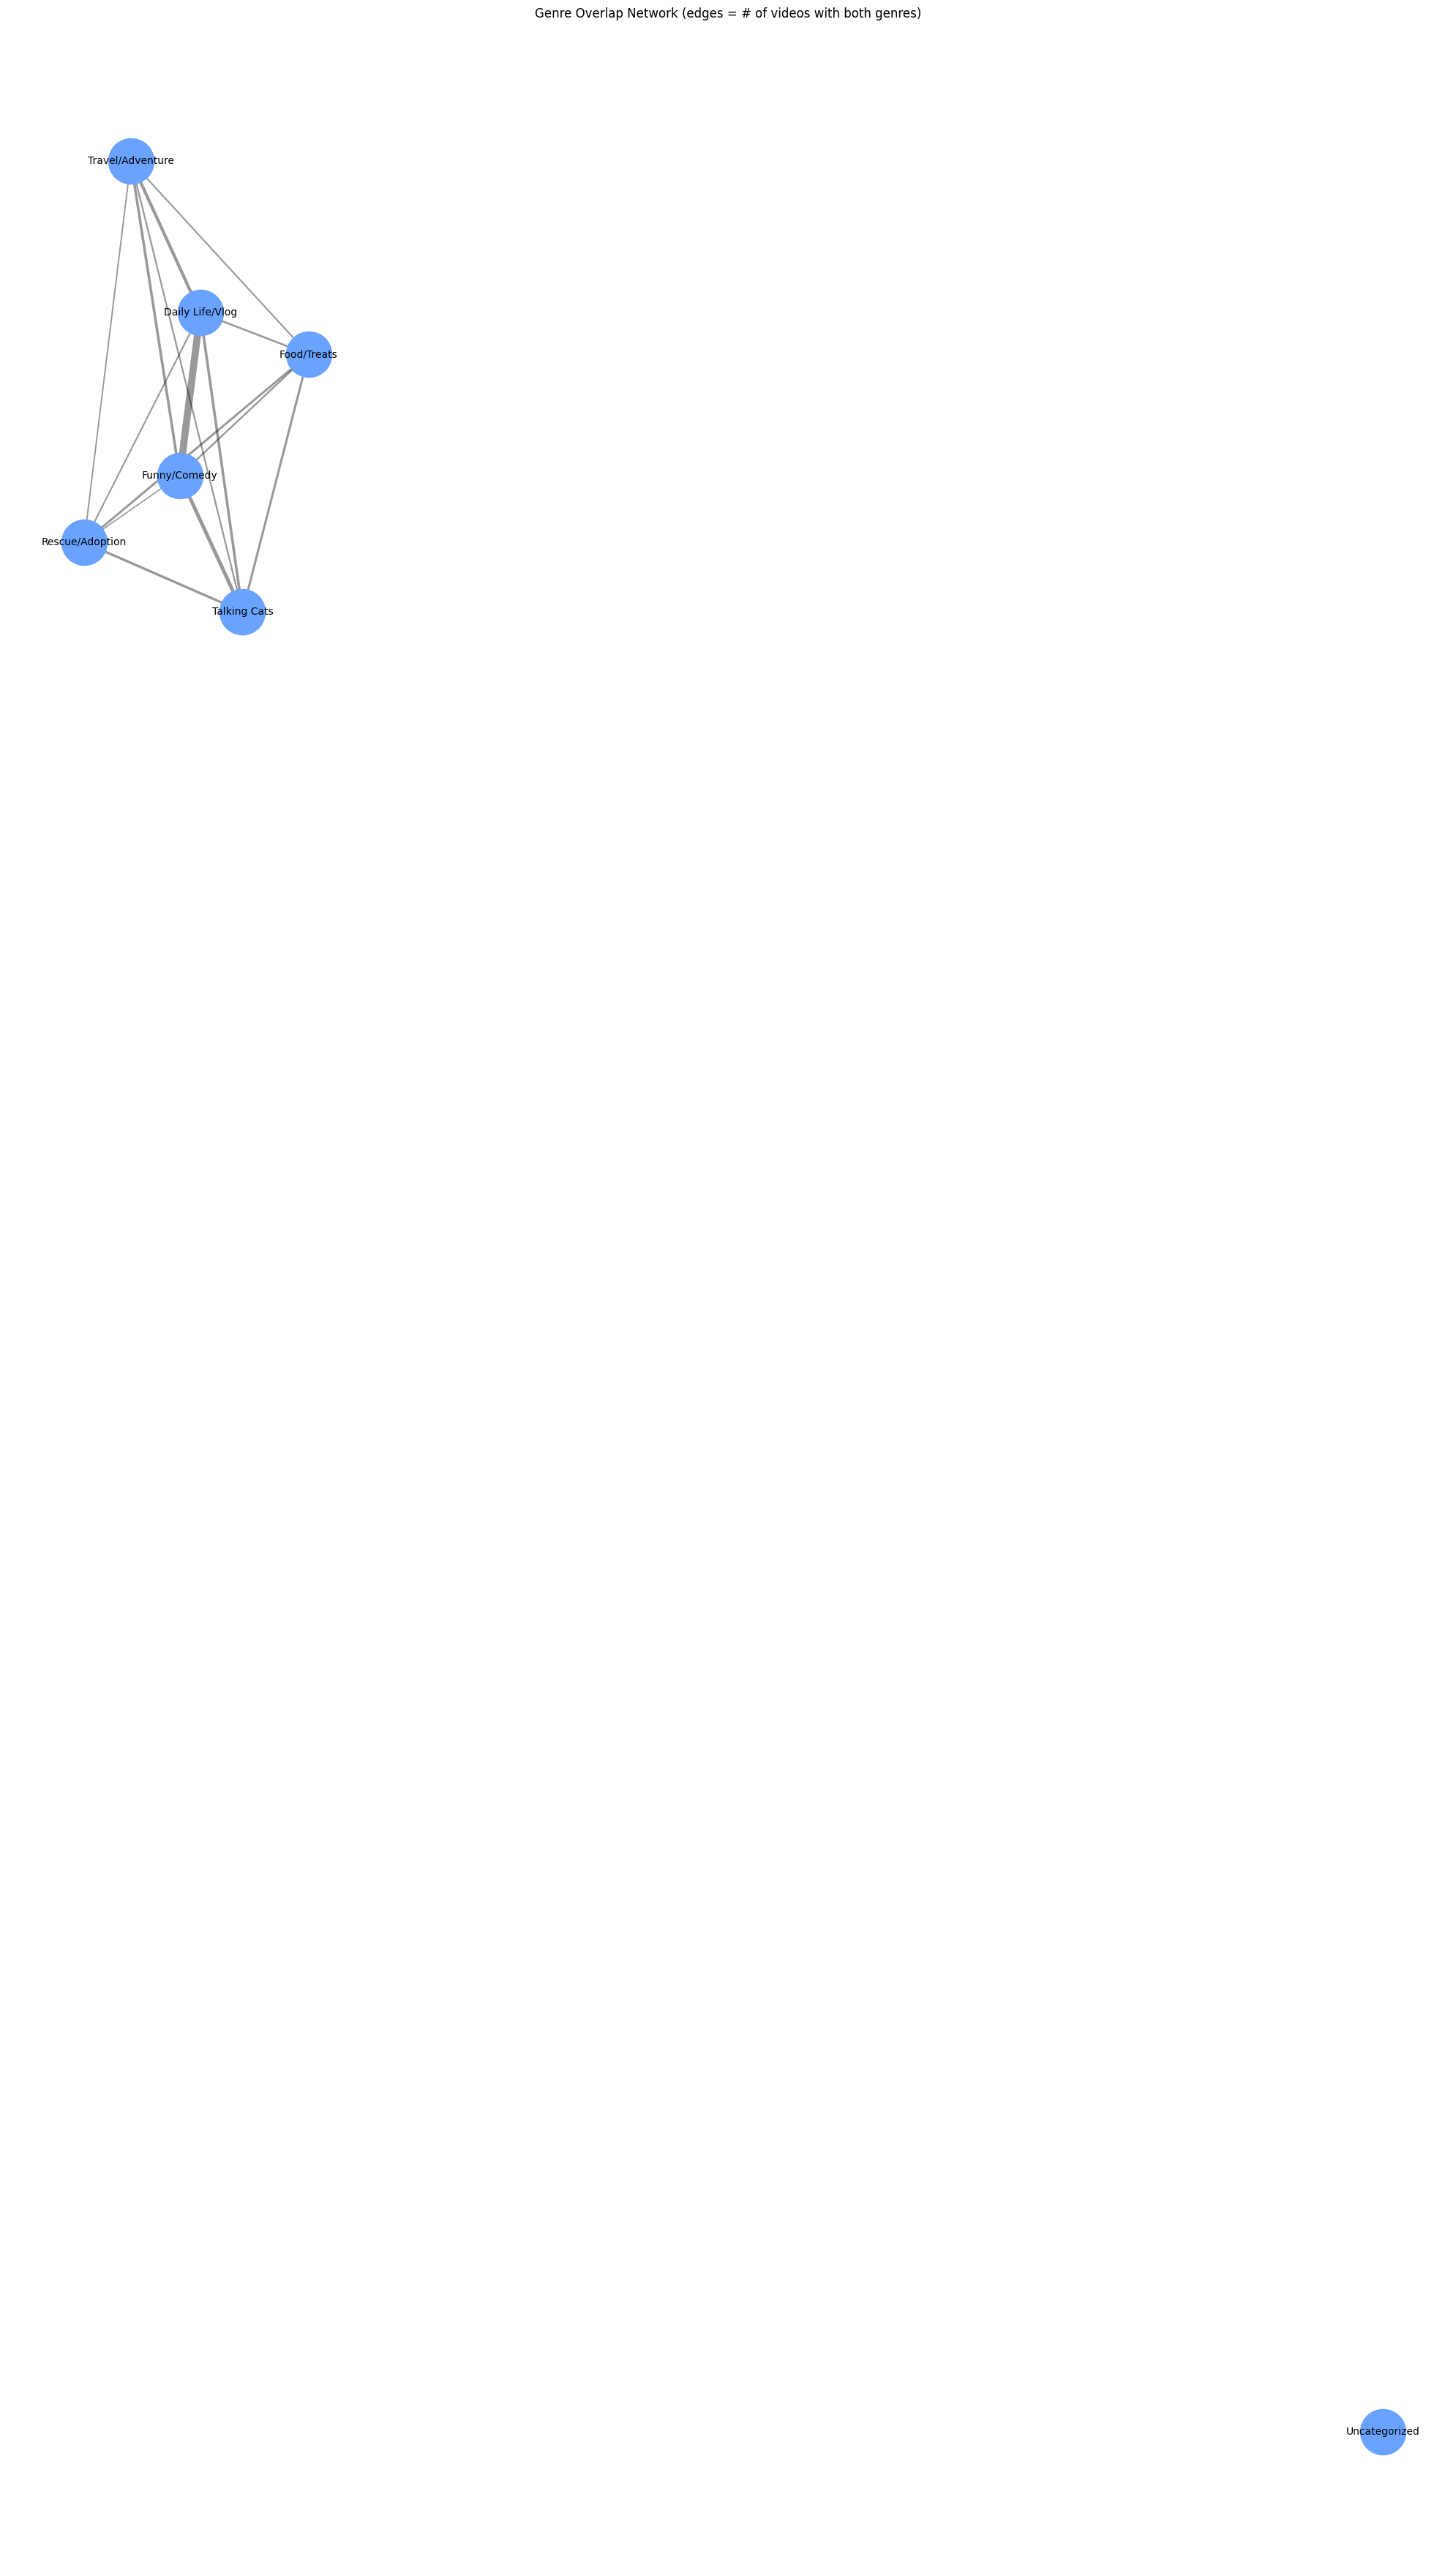

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
from collections import Counter, defaultdict

assert "genres" in df.columns, "DataFrame must have a 'genres' column."

# Convert genre cell to a cleaned list for each row
def parse_genre_cell(cell):
    if isinstance(cell, list):
        return [g.strip() for g in cell if g and str(g).strip()]
    if pd.isna(cell) or str(cell).strip() == "":
        return []
    # assume comma separated string
    parts = [p.strip() for p in str(cell).split(",") if p.strip()]
    return parts

df["genres_list"] = df["genres"].apply(parse_genre_cell)

# Build set of all genres
all_genres = sorted({g for sub in df["genres_list"] for g in sub})
print("Detected genres:", all_genres)


# Bar chart - counts of each genre (by video)
genre_counter = Counter()
for glist in df["genres_list"]:
    # Count of each video per genre it belongs to
    genre_counter.update(glist)

genres = list(genre_counter.keys())
counts = [genre_counter[g] for g in genres]

plt.figure(figsize=(10, 6))
plt.bar(range(len(genres)), counts)
plt.xticks(range(len(genres)), genres, rotation=45, ha="right")
plt.xlabel("Genre")
plt.ylabel("Number of videos")
plt.title("Video counts per genre")
plt.tight_layout()
plt.show()


# Pie chart - distribution of genres
# If a single video can belongs to more than one genre, then that video contributes more than one count to the pie chart
plt.figure(figsize=(7, 7))
plt.pie(counts, labels=genres, autopct="%1.1f%%", startangle=140)
plt.title("Genre distribution (by genre-memberships)")
plt.axis("equal")
plt.show()


# Co-occurrences
edge_weights = defaultdict(int)

for glist in df["genres_list"]:
    unique_genres = sorted(set(glist))
    # If a video has more than two genres, count each pair
    for a, b in combinations(unique_genres, 2):
        edge_weights[(a, b)] += 1



# Graph metrics
G = nx.Graph()
G.add_nodes_from(all_genres)
# Add weighted edges
for (g1, g2), w in edge_weights.items():
    G.add_edge(g1, g2, weight=w)

# Clustering coefficient
clustering = nx.clustering(G, weight="weight")
avg_clustering = nx.average_clustering(G, weight="weight")

# Centralities
betweenness = nx.betweenness_centrality(G, weight="weight", normalized=True)
degree_centrality = nx.degree_centrality(G)  # unweighted
# weighted degree centrality
strength = {n: sum(d.get("weight", 1) for _, _, d in G.edges(n, data=True)) for n in G.nodes()}

# Top nodes by metric
def top_n(dic, n=10):
    return sorted(dic.items(), key=lambda x: x[1], reverse=True)[:n]

print("\nAverage clustering coefficient (weighted):", avg_clustering)
print("\nTop genres by betweenness centrality:")
for g, v in top_n(betweenness, n=len(betweenness)):
    print(f"  {g}: {v:.4f}")

print("\nTop genres by degree centrality:")
for g, v in top_n(degree_centrality):
    print(f"  {g}: {v:.4f}")

print("\nTop genres by weighted degree:")
for g, v in top_n(strength):
    print(f"  {g}: {v}")


# Community detection
from networkx.algorithms import community

if G.number_of_edges() == 0:
    print("\nNo edges in graph; community detection not possible.")
else:
    communities = community.greedy_modularity_communities(G, weight="weight")

    community_list = [list(c) for c in communities]
    print("\nDetected communities:")
    for i, comm in enumerate(community_list, 1):
        print(f"  Community {i} ({len(comm)} genres): {comm}")


pos = nx.spring_layout(G, k=1.8, iterations=60, seed=42)

# Normalize edge widths
weights = [G[u][v]["weight"] for u, v in G.edges()]
max_w = max(weights) if weights else 1
norm_edge_widths = [1 + (w / max_w) * 6 for w in weights]  # thickness 2–8 px

# Plot the network
plt.figure(figsize=(20, 35))

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="#69a3ff")

# Edges
nx.draw_networkx_edges(G, pos, width=norm_edge_widths, alpha=0.4)

# Labels
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Genre Overlap Network (edges = # of videos with both genres)")
plt.axis("off")
plt.tight_layout()
plt.show()

